Logs 
- [2025/02/28]   
  First version of the application of genetic algorithm to one-dimensional
  optimization problem with Ackley's function

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as plt_cm

In [3]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

### Problem statement

$$
  \argmin_{x_1 \in [-5, 5]} 
    f(x_1) = -20 \exp \left( -0.2 \sqrt{x_1^2}\right)
      -\exp\left( \cos(2\pi x_1)\right) 
      + 20 + \exp(1)
$$

In [14]:
def obj_func(x, a=20, b=0.2, c=2.*np.pi):
  term1 = -a*np.exp(-b*np.sqrt(x**2))
  term2 = -np.exp(np.cos(c*x))
  return term1 + term2 + a + np.exp(1) 

The plot of function $f(x_1)`$

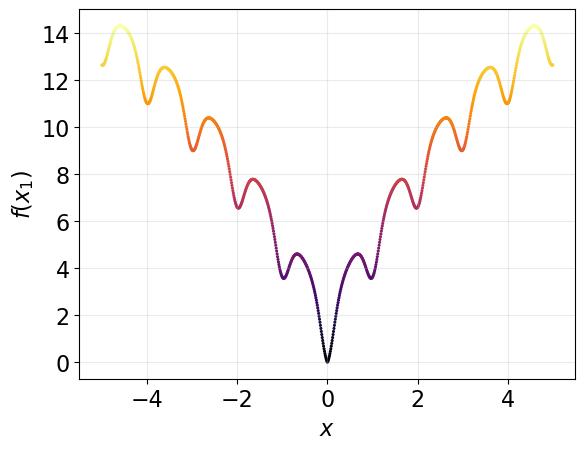

In [16]:
fig, ax = plt.subplots()

Nx = 1000
x_range = [-5., 5.]
x_space = np.linspace(x_range[0], x_range[1], Nx)
f_vals = obj_func(x_space)

ax.scatter(x_space, f_vals, 
            c=plt_cm.inferno(np.abs(f_vals)/np.max(np.abs(f_vals))), 
            edgecolor="none", s=5)

ax.set_xlabel("$x$")
ax.set_ylabel("$f(x_1)$")
ax.grid("on")

plt.show(fig)

### Reproduction

In [19]:
def reproduction(x_ga, rng=None):
  # -- calculate fitness 
  fitness_vals = np.array([obj_func(x_ga_i) for x_ga_i in x_ga])
  
  epsilon = 1e-4   
  fitness_vals += epsilon           # to avoid division by zero
  fitness_vals = 1./fitness_vals    # because we want to achieve minimization 
  
  # -- sort the fitness_vals
  idx_sorted = np.argsort(fitness_vals)
  sorted_fitness_vals = fitness_vals[idx_sorted]
  sorted_x_ga = x_ga[idx_sorted].copy()
  # print(sorted_fitness_vals)

  # -- perform roulette wheel selection
  normalized_fitness_vals = sorted_fitness_vals/np.sum(sorted_fitness_vals)
  normalized_fitness_vals = np.cumsum(normalized_fitness_vals)
  # print(normalized_fitness_vals)
  
  new_x_ga = np.zeros_like(x_ga)
  for i in range(N_sample):
    r = rng.random()
    idx = np.where(normalized_fitness_vals > r)[0][0]
    new_x_ga[i] = sorted_x_ga[idx]
  # print(new_x_ga)

  return new_x_ga

### Crossover

In [20]:
def crossover(x_ga, crossover_rate, rng=None):
  new_x_ga = np.zeros_like(x_ga)

  num_of_crossover = int(crossover_rate * len(x_ga))
  for i in range(num_of_crossover):
    idx = rng.integers(0, len(x_ga))
    x_ga1 = x_ga[idx]
    idx = rng.integers(0, len(x_ga))
    x_ga2 = x_ga[idx]

    # in here we define crossover to be the average
    # in general you can define any crossover method according to the
    # problem you are solving
    new_x_ga[i] = 0.5*(x_ga1 + x_ga2)

  for i in range(num_of_crossover, len(x_ga)):
    new_x_ga[i] = x_ga[i]

  return new_x_ga

### Mutation

In [21]:
def mutation(x_ga, mutation_rate, rng=None):
  r = rng.random()
  
  new_x_ga = np.zeros_like(x_ga)
  for i in range(len(x_ga)):
    if r < mutation_rate:
      # new_x_ga[i] = x_ga[i] + rng.normal(x_ga[i])
      new_x_ga[i] = x_ga[i] + rng.normal(x_ga[i], 0.01)
    else:
      new_x_ga[i] = x_ga[i]
  
  return new_x_ga

### Running genetic algorithm

In [25]:
seed = 25_02_22   # the underscore does not change the value, it is still an integer
rng = np.random.default_rng(seed)

N_sample = 20   # number of samples should be even
x_range = [-5., 5.]
x_ga = rng.uniform(x_range[0], x_range[1], N_sample,)
# print(x_ga)

G_max = 100
crossovoer_rate = 0.9
mutation_rate = 0.1
sf_max = 0.001      # standard deviation for fitness values

hist_x_ga = np.zeros((1, N_sample))
hist_x_ga[0] = x_ga.copy()
hist_fitness_vals = np.zeros((1, N_sample))
hist_fitness_vals[0] = obj_func(x_ga[0])

is_converged = False
for G in range(G_max):
  # -- sampling mating pool (reproduction = fitness and roulette wheel selection)
  new_x_ga = reproduction(x_ga, rng=rng)

  # -- crossover
  new_x_ga = crossover(new_x_ga, crossovoer_rate, rng=rng) 

  # -- mutation
  new_x_ga = mutation(new_x_ga, mutation_rate, rng=rng)
  print(new_x_ga)

  # -- test convergence
  fitness_vals = np.array([obj_func(x_ga_i) for x_ga_i in x_ga])
  # print(fitness_vals)
  sf_fitness = np.std(fitness_vals) 


  if sf_fitness < sf_max:
    print(f"Converged at generation {G}")
    is_converged = True
    break
  else:
    hist_x_ga = np.append(hist_x_ga, [new_x_ga], axis=0)
    hist_fitness_vals = np.append(hist_fitness_vals, 
      [[obj_func(x_ga_i) for x_ga_i in new_x_ga]], axis=0)
    x_ga = new_x_ga.copy()

if not is_converged:
  print(f"Solution is not convergent")

[ 1.12531549  0.66204384 -0.98263833  2.01853066  1.21190929  1.12531549
  0.89356611  0.08750248 -0.98263833 -0.98263833 -0.98263833  2.60263457
  0.66204384 -3.01668816 -0.53787782 -0.98263833 -0.46292071  2.60263457
 -2.81013196 -3.14597364]
[-0.16029725 -0.98263833 -0.76025808  0.37477316 -0.04453611 -0.44756793
  0.60640898 -0.16029725 -0.44756793  0.06208301  0.4905343   0.37477316
  0.08750248 -0.98263833 -0.44756793 -0.44756793  0.51794616  0.74032642
  0.66204384 -0.98263833]
[ 0.00877345  0.08750248 -0.03639738  0.00877345  0.37477316  0.02148318
 -0.98263833  0.16511853  0.08750248 -0.24605202  0.00877345 -0.03639738
 -0.18003272  0.30875387  0.00877345 -0.46027766  0.07479275  0.00877345
  0.06208301  0.08750248]
[ 0.00877345  0.00877345  0.00877345  0.00877345  0.00877345  0.00877345
  0.00877345 -0.01381197 -0.01381197  0.00877345  0.00877345 -0.01381197
 -0.01381197  0.00877345  0.00877345  0.00877345  0.00877345 -0.01381197
  0.00877345  0.00877345]
[ 0.00877345  0.0087

The history of fitness values

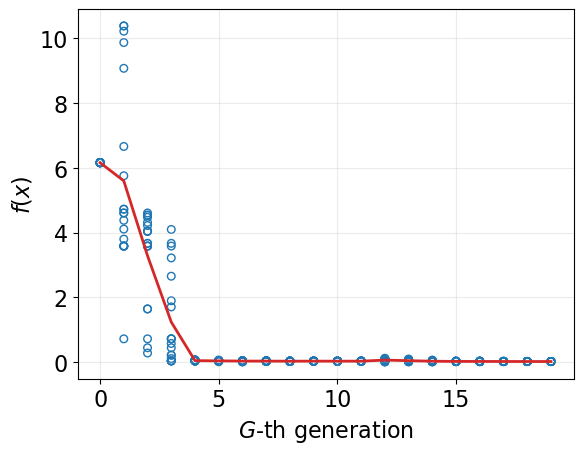

In [26]:
fig, ax = plt.subplots()

mean_fitness_over_population = []
for idx_hist in range(len(hist_x_ga)):
  x_ga_i = hist_x_ga[idx_hist]
  fitness_vals = hist_fitness_vals[idx_hist]
  ax.scatter(np.ones_like(x_ga_i)*idx_hist, hist_fitness_vals[idx_hist], 
              color="tab:blue", facecolor="None", s=30)
  mean_fitness = np.mean(fitness_vals)
  mean_fitness_over_population = np.append(mean_fitness_over_population, [mean_fitness])

# print(mean_fitness_over_population)
ax.plot(mean_fitness_over_population, color="tab:red", lw=2)

ax.set_xlabel("$G$-th generation")
ax.set_ylabel("$f(x)$")
ax.grid("on")

plt.show(fig)

Plot initial and the best solution

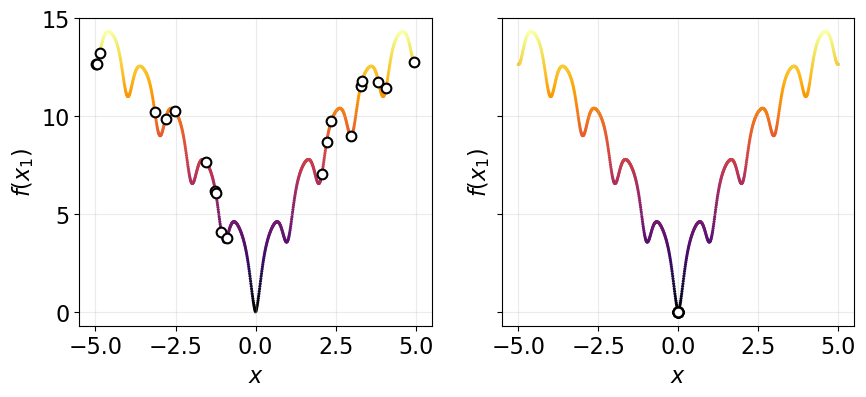

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

# -- left plot
Nx = 1000
x_range = [-5., 5.]
x_space = np.linspace(x_range[0], x_range[1], Nx)
f_vals = obj_func(x_space)

axes[0].scatter(x_space, f_vals, 
            c=plt_cm.inferno(np.abs(f_vals)/np.max(np.abs(f_vals))), 
            edgecolor="none", s=5)

for i, x_ga_i in enumerate(hist_x_ga[0]):
  f_x_ga_i = obj_func(x_ga_i)
  # print(f_x_ga_i)
  axes[0].plot([x_ga_i], [f_x_ga_i], color="k", linestyle="None", marker="o", markerfacecolor="w", 
    markeredgecolor="k", linewidth=3, markeredgewidth=1.5, markersize=7)

axes[0].set_xlabel("$x$")
axes[0].set_ylabel("$f(x_1)$")
axes[0].grid("on")

# -- right plot 
Nx = 1000
x_range = [-5., 5.]
x_space = np.linspace(x_range[0], x_range[1], Nx)
f_vals = obj_func(x_space)

axes[1].scatter(x_space, f_vals, 
            c=plt_cm.inferno(np.abs(f_vals)/np.max(np.abs(f_vals))), 
            edgecolor="none", s=5)

for i, x_ga_i in enumerate(hist_x_ga[-1]):
  f_x_ga_i = obj_func(x_ga_i)
  # print(f_x_ga_i)
  axes[-1].plot([x_ga_i], [f_x_ga_i], color="k", linestyle="None", marker="o", markerfacecolor="w", 
    markeredgecolor="k", linewidth=3, markeredgewidth=1.5, markersize=7)

axes[-1].set_xlabel("$x$")
axes[-1].set_ylabel("$f(x_1)$")
axes[-1].grid("on")
plt.show(fig)